<img src='logo.png' alt='logo' width=200 align='center' />

<h1 align='center'> The Spark Foundation. </h1>

<h2 align='center'> Data Science and Business Analytics. </h2>

<h2 align='center'> Task: 02 </h2>

<h3 align='center'> Prediction using Unsupervised ML </h3>

<h4 align='center'> We're going to predict the optimum no. of clusters using the given <b> IRIS </b> dataset. </h4>

<h2 align='center'> By: Parvej Shaikh </h2>

<h5> Importing Libraries: </h5>

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
from sklearn.cluster import KMeans

<h5> Importing Data: </h5>

In [6]:
df = pd.read_csv('Iris.csv')

In [7]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


<h5> EDA: </h5>

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [9]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [10]:
df.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

<h5> Visualization: </h5>

In [11]:
df = df.drop(['Id'], axis=1)
df['Species'] = df['Species'].apply(lambda x: 0 if x == 'Iris-setosa' else 1 if x == 'Iris-versicolor' else 2) 
df.sample(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
103,6.3,2.9,5.6,1.8,2
88,5.6,3.0,4.1,1.3,1
5,5.4,3.9,1.7,0.4,0
106,4.9,2.5,4.5,1.7,2
130,7.4,2.8,6.1,1.9,2


<Figure size 1000x500 with 0 Axes>

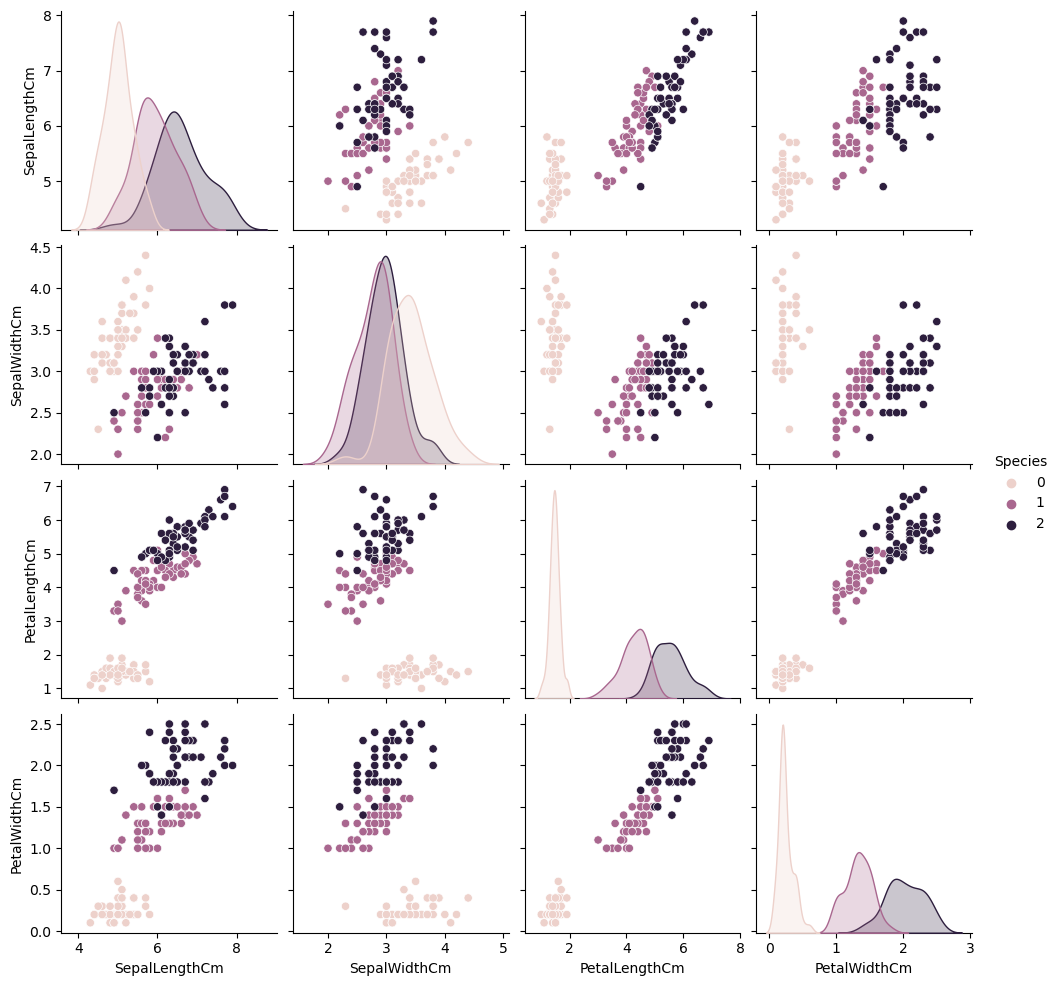

In [12]:
plt.figure(figsize=(10, 5))
sns.pairplot(df, hue='Species')
plt.show()

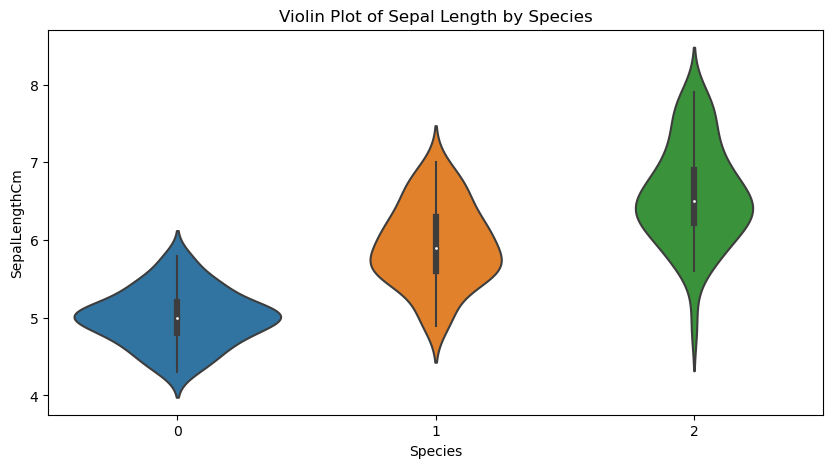

In [13]:
plt.figure(figsize=(10, 5))
sns.violinplot(x='Species', y='SepalLengthCm', data=df)
plt.title('Violin Plot of Sepal Length by Species')
plt.show()

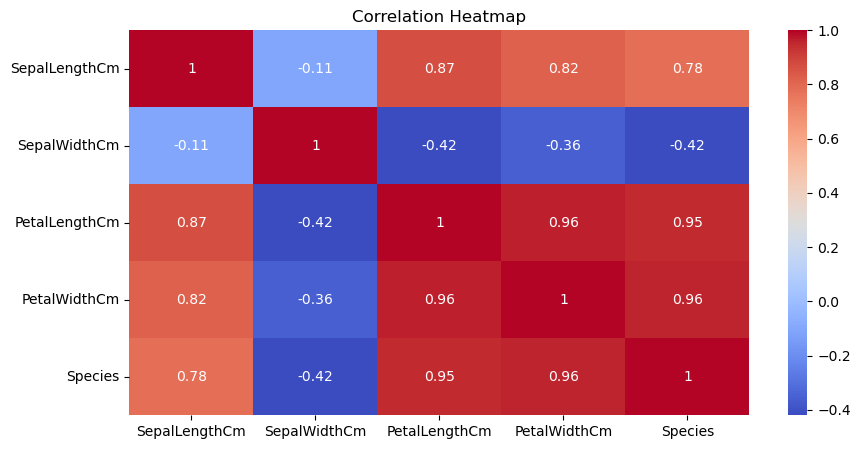

In [14]:
plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

C:\Users\abdul\anaconda3\lib\site-packages\seaborn\categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


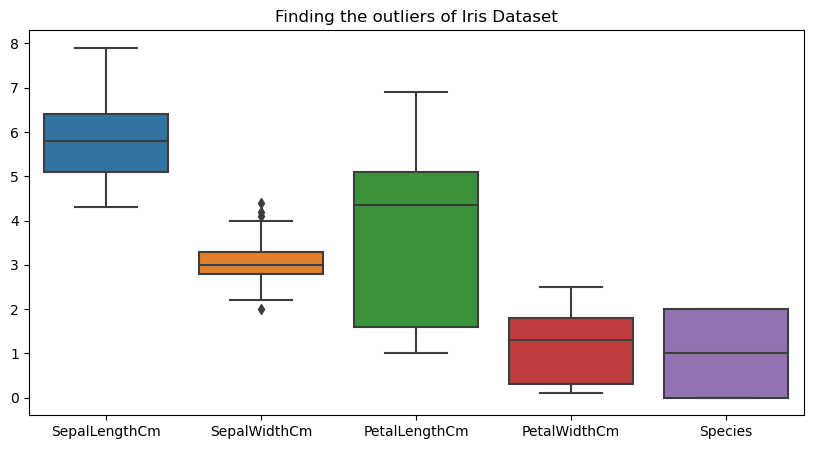

In [15]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df)
plt.title('Finding the outliers of Iris Dataset')
plt.show()

In [16]:
X = df.drop('Species', axis=1).values

In [17]:
# WE are using the Elbow Method to find out the optimum no. of clusters
wcss = []
for i in range(2, 10):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

<h1> Elbow Method: </h1>

<h5> It is an unsupervised method that helps us to find optimum no. of cluster in KMeans. </h5>

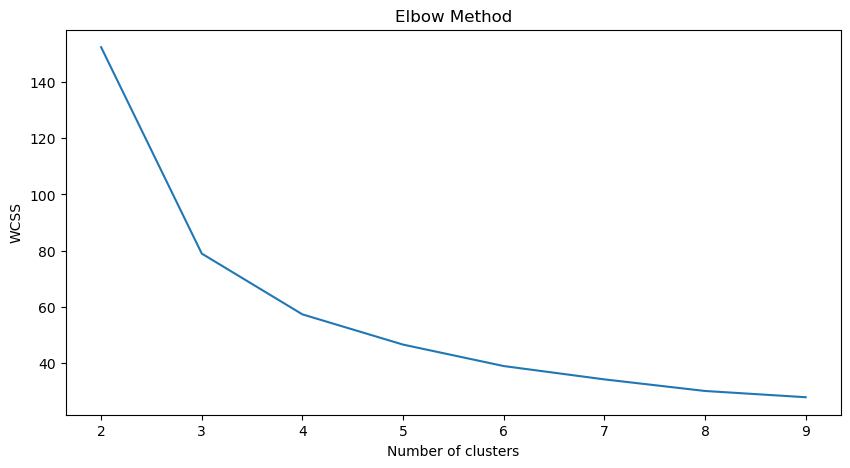

In [18]:
# Plot the Elbow Method
plt.figure(figsize=(10,5))
plt.plot(range(2, 10), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [19]:
# Applying KMeans with thwe optimum no. of clusters
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

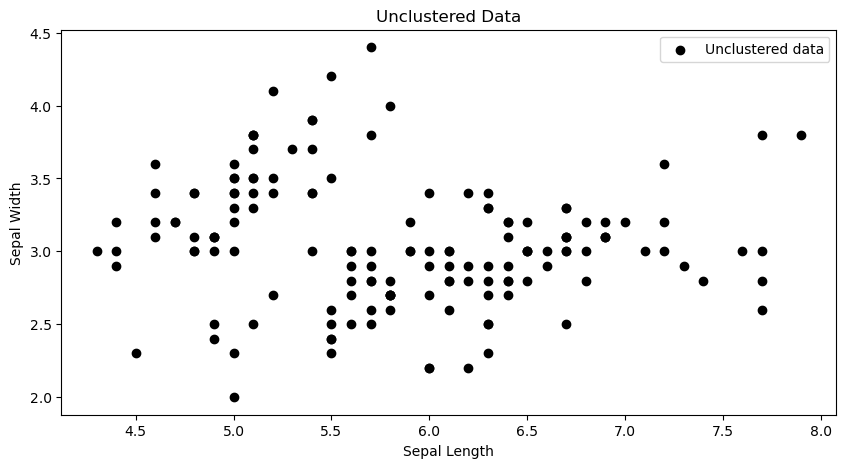

In [20]:
# Groups Before clustering
plt.figure(figsize=(10,5))
plt.scatter(X[:,0], X[:,1], c='black', label='Unclustered data')
plt.title('Unclustered Data')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()

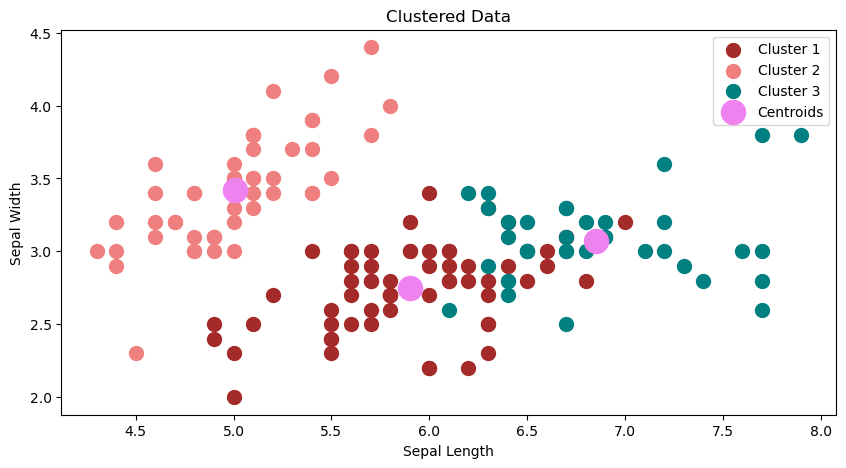

In [21]:
# Groups After clustering
plt.figure(figsize=(10,5))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='brown', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c='lightcoral', label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c='teal', label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s=300, c='violet', label='Centroids')
plt.title('Clustered Data')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()

<h1> Silhouette Score: </h1>

<h5> Howwell our data points belong to our new clusters.</h5>

In [22]:
from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_)

0.5525919445499757

<h1> KMeans Inertia: </h1>

<h5> It measures that how closely our data points were grouped. </h5>

In [23]:
kmeans.inertia_

78.94084142614601

In [24]:
# Done. And Thanks for watching.